### Введение.

Сеть фитнес - центров «Культурист - датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста - датасаентиста» перевёл в электронный вид множество анкет пользователей. Необходимо провести анализ и подготовить план действий по удержанию клиентов.


Описание данных:

Таблица `gym_churn.csv`:

- `Churn` — факт оттока в текущем месяце;

Данные пользователя за предыдущий до проверки факта оттока месяц:
- `gender` — пол;
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- `Phone` — наличие контактного телефона;
- `Age` — возраст;
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах);

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
- `Group_visits` — факт посещения групповых занятий;
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон;





<a id="table_of_contents"></a>
#### Содержание:
* [Шаг 1. Импорт библиотек и данных. Изучение общей информации.](#step_1)
* [Шаг 2. Исследовательский анализ данных.](#step_2)
    * [2.1. Изучение датасета. Поиск отсутствующих признаков, изучение средних значения и стандартных отклонений.](#step_2_1)
    * [2.2. Изучение средних значений признаков в двух группах - тех, кто ушел в отток и тех, кто остался.](#step_2_2)
    * [2.3. Cтолбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).](#step_2_3)
        * [2.3.1. Графики для категориальных переменных (гистограмма).](#step_2_3_1)
            * [2.3.1.1. Признак `gender` пол.](#step_2_3_1_1)
            * [2.3.1.2. Признак `near_location` - проживание или работа в районе, где находится фитнес-центр.](#step_2_3_1_2)
            * [2.3.1.3. Признак `partner` - сотрудник компании-партнёра клуба.](#step_2_3_1_3)
            * [2.3.1.4. Признак `promo_friends` - факт первоначальной записи в рамках акции «приведи друга».](#step_2_3_1_4)
            * [2.3.1.5. Признак `phone` - наличие контактного телефона.](#step_2_3_1_5)
            * [2.3.1.6. Признак `contract_period` - длительность текущего действующего абонемента (месяц, 6 месяцев, год).](#step_2_3_1_6)
            * [2.3.1.7. Признак `group_visits` - факт посещения клиентом групповых занятий.](#step_2_3_1_7)
        * [2.3.2. Графики для количественных переменных (гистограмма + диаграмма размаха).](#step_2_3_2)
            * [2.3.2.1. Признак `age` возраст.](#step_2_3_2_1)
            * [2.3.2.2. Признак `avg_additional_charges_total` - суммарная выручка от других услуг фитнес-центра.](#step_2_3_2_2)
            * [2.3.2.3. Признак `month_to_end_contract` - срок до окончания текущего действующего абонемента (в месяцах).](#step_2_3_2_3)
            * [2.3.2.4. Признак `lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).](#step_2_3_2_4)
            * [2.3.2.5. Признак `Avg_class_frequency_total` - средняя частота посещений в неделю за все время с начала действия абонемента.](#step_2_3_2_5)
            * [2.3.2.6. Признак `avg_class_frequency_current_month` - средняя частота посещений в неделю за предыдущий месяц.](#step_2_3_2_6)
    * [2.4. Матрица корреляций.](#step_2_4)
* [Шаг 2. Вывод](#step_2_total)
* [Шаг 3. Построение модели прогнозирования оттока пользователей.](#step_3)
    * [3.1. Разбиение данных на обучающую и валидационную выборку.](#step_3_1)
    * [3.2. Обучение модели на train-выборке.](#step_3_2)
        * [3.2.1. Логистическая регрессия.](#step_3_2_1)
        * [3.2.2. Cлучайный лес.](#step_3_2_2)
    * [3.3. Оценка метрик accuracy, precision и recall для обеих моделей на валидационной выборке. Сравние по ним моделей. Какая модель показала себя лучше на основании метрик?.](#step_3_3)
* [Шаг 3. Вывод](#step_3_total)
* [Шаг 4. Кластеризация пользователей.](#step_4)
    * [4.1. Стандартизация данных.](#step_4_1)
    * [4.2. Посторение матрицы расстояний на стандартизованной матрице признаков + дендрограмма.](#step_4_2)
    * [4.3. Обучение модели кластеризации на основании алгоритма K-Means и прогноз кластеров клиентов. Число кластеров принимаем за 5.](#step_4_3)
    * [4.4. Средние значения признаков для кластеров.](#step_4_4)
    * [4.5. Распределения признаков для кластеров.](#step_4_5)
* [Шаг 4. Вывод](#step_4_total)
* [Итог.](#step_total)

<a id="step_1"></a>
### Шаг 1. Импорт библиотек и данных. Изучение общей информации.
[К содержанию](#table_of_contents)

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import requests
from io import BytesIO

spreadsheet_id = '1lzTenOpVcQJel352CRwz7nDp90GZtfYYpd0rqNvLYSg'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)

import warnings

warnings.filterwarnings('ignore')

In [2]:
try:
    
    gym_churn = pd.read_csv('/datasets/gym_churn.csv')   
        
except:
    
    gym_churn = pd.read_csv(BytesIO(r.content)) 

In [3]:
display(gym_churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

In [4]:
gym_churn.columns = gym_churn.columns.str.lower()

In [5]:
display(gym_churn.head(10))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


<a id="step_2"></a>
### Шаг 2. Исследовательский анализ данных.

<a id = "step_2_1"></a>
##### 2.1. Изучение датасета. Поиск отсутствующих признаков, изучение средних значения и стандартных отклонений.
[К содержанию](#table_of_contents)

In [6]:
print('Количество пропусков в признаках:')
print(gym_churn.isna().sum())
print('')
print('Количество дубликатов:', gym_churn.duplicated().sum())

Количество пропусков в признаках:
gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

Количество дубликатов: 0


In [7]:
display(gym_churn.describe().round(2))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.00,4000.00,4000.00,4000.00,4000.0,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.51,0.85,0.49,0.31,0.9,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.3,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.0,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.0,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.0,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.0,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.0,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


Портрет среднестатистического клиента:

Клиент мужчина или женщина 29-ти лет, проживающий или работающий в районе, где находится фитнес-центр, является обладателем абонемента сроком на 1 месяц, не посещает групповые занятия, тратит на доп. услуги 147р, уже посещает клуб более, чем 3 месяца 2 раза в неделю. Пришел в центр независимо (не по акции). У центра есть контактный телефон клиента.

Так же, стоит обратить внимание на сильное различие стандартных отклонений (std) в признаках (к примеру, в `age` и  `avg_additional_charges_total`). Перед обучением, признаки необходимо будет стандартизировать.

<a id = "step_2_2"></a>
##### 2.2. Изучение средних значений признаков в двух группах - тех, кто ушел в отток и тех, кто остался.
[К содержанию](#table_of_contents)

In [8]:
display(gym_churn.groupby('churn').agg('mean').T)

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


<a id = "step_2_3"></a>
##### 2.3. Cтолбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).
[К содержанию](#table_of_contents)

In [9]:
def percent_calculation(sign):
    t = gym_churn.groupby(['churn', sign]).count().reset_index()
    t = t['gender'].reset_index().rename(columns={'gender': 'count'}).drop(['index'], axis=1)
    t['proportion'] = (t['count'] / t['count'].sum())
    t['proportion'] = t['proportion'].map(lambda n: '{:,.2%}'.format(n))
    display(t)

<a id = "step_2_3_1"></a>
##### 2.3.1. Графики для категориальных переменных (гистограмма).
[К содержанию](#table_of_contents)

<a id = "step_2_3_1_1"></a>
2.3.1.1. Признак `gender` - пол:</p>
[К содержанию](#table_of_contents)

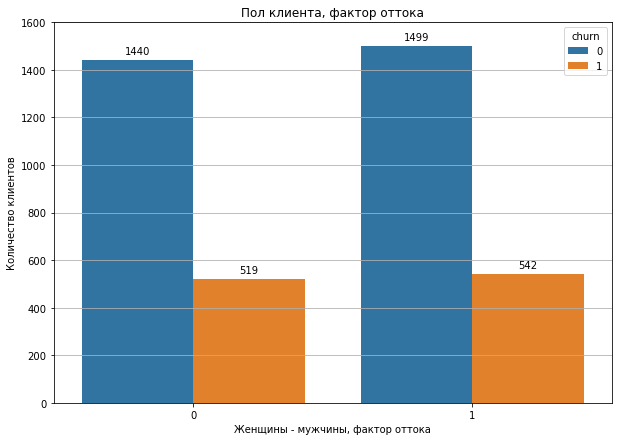

In [10]:
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.title('Пол клиента, фактор оттока')
plot = sns.countplot(data = gym_churn, x = 'gender', hue = 'churn')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plot.set_ylim(0, 1600)
plt.ylabel('Количество клиентов')
plt.xlabel('Женщины - мужчины, фактор оттока')
plt.show()

Среди женщин и мужчин особых различий нет, как для постоянных клиентов, так и для непостоянных.

<a id = "step_2_3_1_2"></a>
2.3.1.2. Признак `near_location` - проживание или работа в районе, где находится фитнес-центр:</p>
[К содержанию](#table_of_contents)

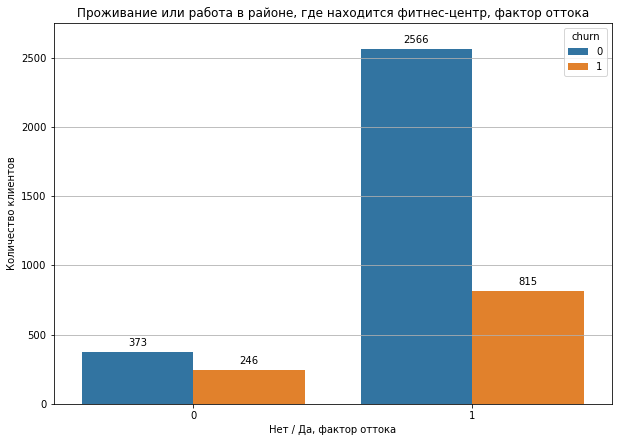

In [11]:
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.title('Проживание или работа в районе, где находится фитнес-центр, фактор оттока')
plot = sns.countplot(data = gym_churn, x = 'near_location', hue = 'churn')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plot.set_ylim(0, 2750)
plt.ylabel('Количество клиентов')
plt.xlabel('Нет / Да, фактор оттока')
plt.show()

In [12]:
percent_calculation('near_location')

,count,proportion
0,373,9.32%
1,2566,64.15%
2,246,6.15%
3,815,20.38%


Более 84% всех пользователей фитнес-центра постоянно проживают / работают в том же районе, что и фитнес-центр. Из них, около 64% являются постоянными клиентами. Фактор оттока: У не проживающих - 39,74%, у проживающих - 24,11%

<a id = "step_2_3_1_3"></a>
2.3.1.3. Признак `partner` - сотрудник компании-партнёра клуба:</p>
[К содержанию](#table_of_contents)

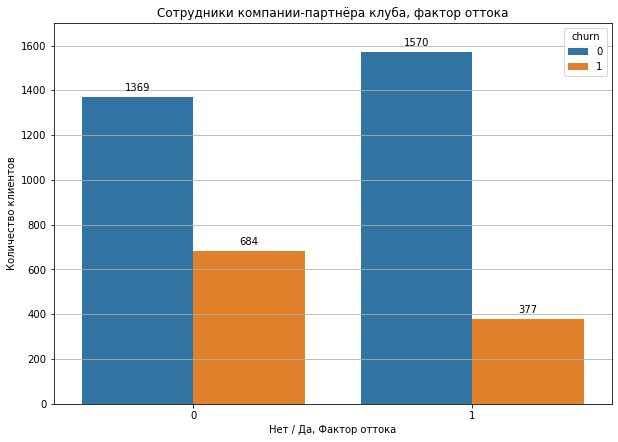

In [13]:
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.title('Сотрудники компании-партнёра клуба, фактор оттока')
plot = sns.countplot(data = gym_churn, x = 'partner', hue = 'churn')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plot.set_ylim(0, 1700)
plt.ylabel('Количество клиентов')
plt.xlabel('Нет / Да, Фактор оттока')
plt.show()

In [14]:
percent_calculation('partner')

,count,proportion
0,1369,34.23%
1,1570,39.25%
2,684,17.10%
3,377,9.43%


Клиентов "со стороны" и клиентов - партнеров фитнес - центра примерно поровну: 51,33% и 48,67% соответственно. Однако, среди клиентов - партнеров наблюдается меньший отток, чем у сторонних клиентов. Фактор оттока: у сторонних клиентов - 33,32%, у клиентов - партнеров - 19,36%

<a id = "step_2_3_1_4"></a>
2.3.1.4. Признак `promo_friends` - факт первоначальной записи в рамках акции «приведи друга»:</p>
[К содержанию](#table_of_contents)

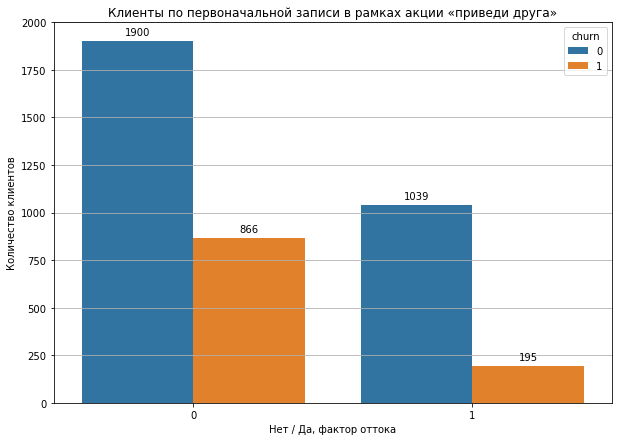

In [15]:
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.title('Клиенты по первоначальной записи в рамках акции «приведи друга»')
plot = sns.countplot(data = gym_churn, x = 'promo_friends', hue = 'churn')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plot.set_ylim(0, 2000)
plt.ylabel('Количество клиентов')
plt.xlabel('Нет / Да, фактор оттока')
plt.show()

In [16]:
percent_calculation('promo_friends')

,count,proportion
0,1900,47.50%
1,1039,25.97%
2,866,21.65%
3,195,4.88%


Основной объем клиентов фитнес - центра пришел не по акции, таких: 69,15%, Однако, треть таких клиентов (примерно 31,30%) оказались в оттоке. Что нельзя сказать о клиентах по акции (таких 30,85%). Из всех пришедших по акции клиентов, только 15,8% попали в отток. Фактор оттока: у клиентов без акции - 31,31%, у клиентов, пришедших по акции - 15,8%

<a id = "step_2_3_1_5"></a>
2.3.1.5. Признак `phone` - наличие контактного телефона:</p>
[К содержанию](#table_of_contents)

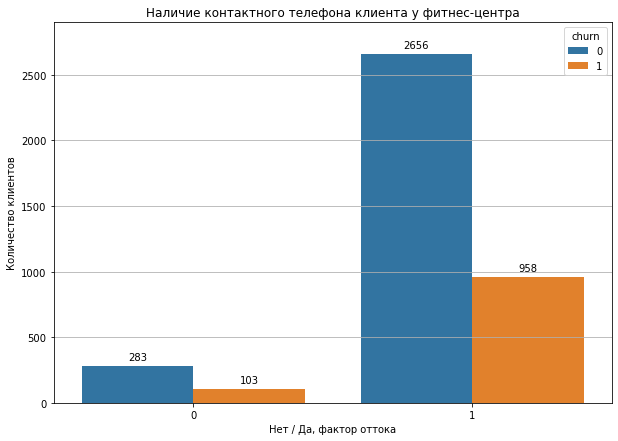

In [17]:
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.title('Наличие контактного телефона клиента у фитнес-центра')
plot = sns.countplot(data = gym_churn, x = 'phone', hue = 'churn')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plot.set_ylim(0, 2900)
plt.ylabel('Количество клиентов')
plt.xlabel('Нет / Да, фактор оттока')
plt.show()

In [18]:
percent_calculation('phone')

,count,proportion
0,283,7.07%
1,2656,66.40%
2,103,2.57%
3,958,23.95%


У фитнес - центра имеется 90,35% контактных телефонов всех клиентов. Однако, это знание никак не сказывается на отток. В случае, когда фитнес - центр контактный телефон клиента не знает, отток составляет: 26,68% безтелефонных клиентов. В случае, когда фитнес - центр контактный телефон клиента знает, отток составляет: 26,51%.

<a id = "step_2_3_1_6"></a>
2.3.1.6. Признак `contract_period` - длительность текущего действующего абонемента (месяц, 6 месяцев, год):</p>
[К содержанию](#table_of_contents)

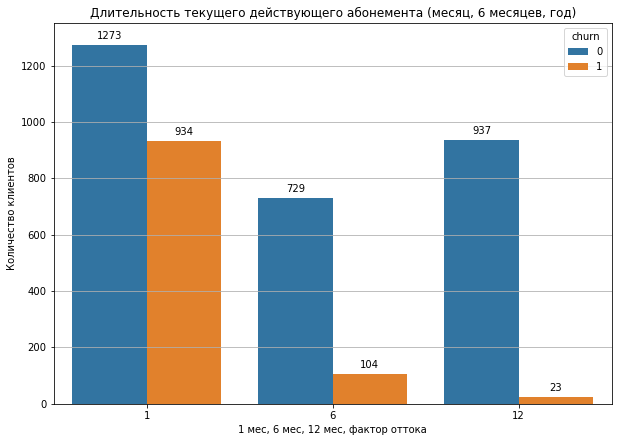

In [19]:
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.title('Длительность текущего действующего абонемента (месяц, 6 месяцев, год)')
plot = sns.countplot(data = gym_churn, x = 'contract_period', hue = 'churn')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plot.set_ylim(0, 1350)
plt.ylabel('Количество клиентов')
plt.xlabel('1 мес, 6 мес, 12 мес, фактор оттока')
plt.show()

In [20]:
percent_calculation('contract_period')

,count,proportion
0,1273,31.82%
1,729,18.22%
2,937,23.43%
3,934,23.35%
4,104,2.60%
5,23,0.57%


Почти половина всех пользователей (55,17%) покупает абонемент на 1 месяц и тут же самый большой отток: 42,32% из всех, кто купил месячный абонемент. Другое дело полугодовой, а особенно годовой абонемен. В последнем, самый минимальный оттток и второе место по постоянным клиентам. Фактор оттока: у клиентов с абонементом на 1 месяц - 42,31%, у клиентов с абонементом на 6 месяцев - 12,48%, у клиентов с абонементом на 12 месяцев - 2,4%.

<a id = "step_2_3_1_7"></a>
2.3.1.7. Признак `group_visits` - факт посещения клиентом групповых занятий:</p>
[К содержанию](#table_of_contents)

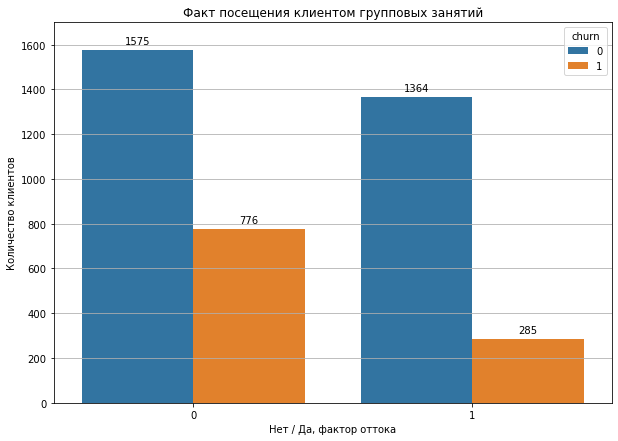

In [21]:
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.title('Факт посещения клиентом групповых занятий')
plot = sns.countplot(data = gym_churn, x = 'group_visits', hue = 'churn')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plot.set_ylim(0, 1700)
plt.ylabel('Количество клиентов')
plt.xlabel('Нет / Да, фактор оттока')
plt.show()

In [22]:
percent_calculation('group_visits')

,count,proportion
0,1575,39.38%
1,1364,34.10%
2,776,19.40%
3,285,7.12%


Групповые занатия не любят 58,78% всех клиентов фитнес - центра. Однако, если клиент посещает групповые занятия, то он станвится более постоянным, отток среди посещающих: 20,89% против 33,01% не посещающих.

<a id = "step_2_3_2"></a>
##### 2.3.2. Графики для количественных переменных (гистограмма + диаграмма размаха).
[К содержанию](#table_of_contents)

<a id = "step_2_3_2_1"></a>
2.3.2.1. Признак `age` - возраст:</p>
[К содержанию](#table_of_contents)

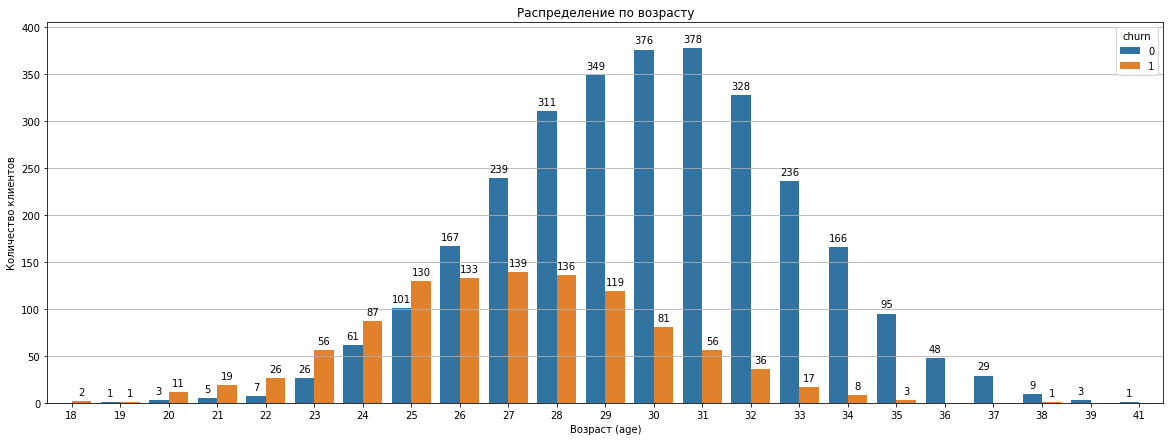

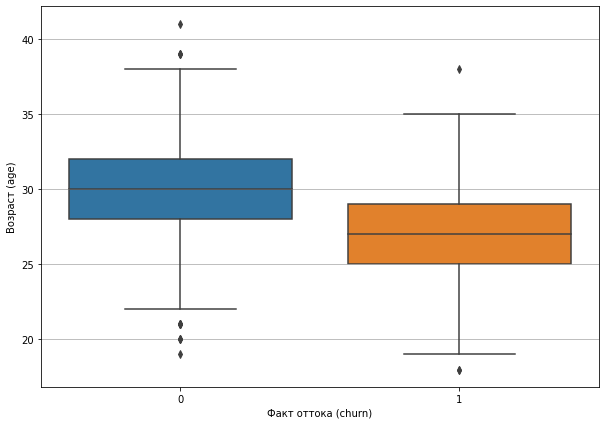

churn,0,1
count,2939,1061
mean,29,26
std,3,2
min,19,18
25%,28,25
50%,30,27
75%,32,29
max,41,38


In [23]:
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.title('Распределение по возрасту')
plot = sns.countplot(data = gym_churn, x = 'age', hue = 'churn')
#plot = sns.histplot(data = gym_churn, x = 'age', hue = 'churn', multiple="dodge")
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plot.set_ylim(0, 405)
plt.ylabel('Количество клиентов')
plt.xlabel('Возраст (age)')
plt.show()

plt.figure(figsize=(10, 7))
plt.grid(True)
plt.title('')
sns.boxplot(data = gym_churn, y = 'age', x = 'churn')
plt.ylabel('Возраст (age)')
plt.xlabel('Факт оттока (churn)')
plt.show()
display(gym_churn.groupby('churn')['age'].describe().astype('int').T)

Средний возраст клиента, продолжающегося пользоваться услугами фитнес-центра: 29 лет, непостоянного - 26.

<a id = "step_2_3_2_2"></a>
2.3.2.2. Признак `avg_additional_charges_total` - суммарная выручка от других услуг фитнес-центра:</p>
[К содержанию](#table_of_contents)

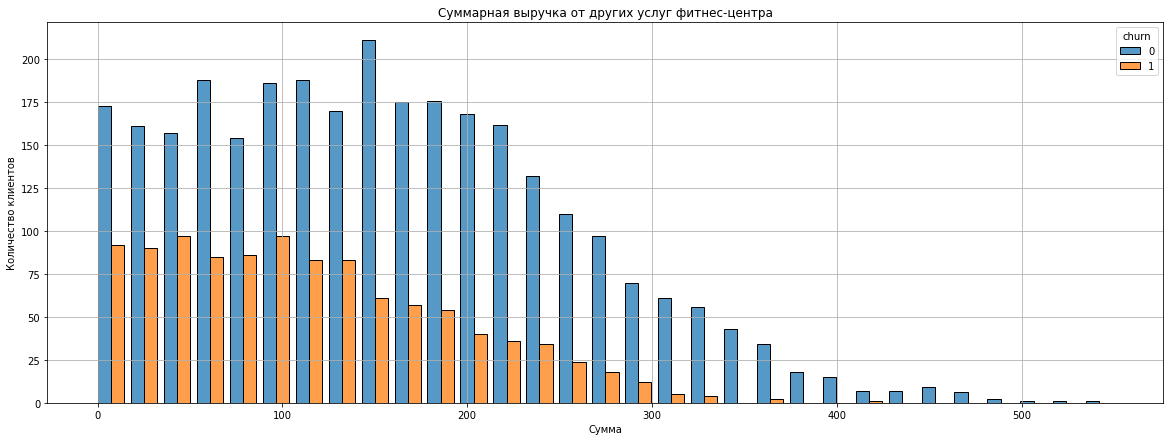

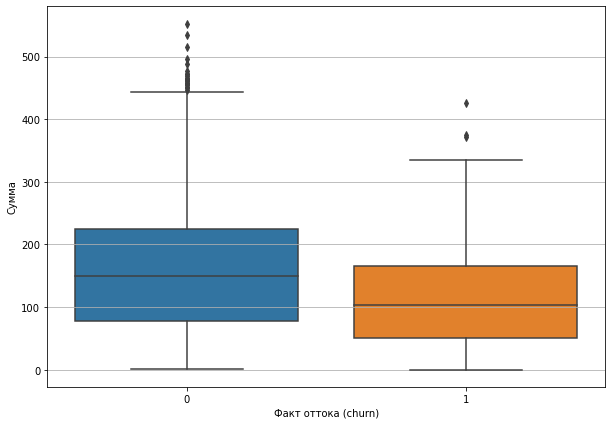

churn,0,1
count,2939,1061
mean,158,115
std,99,77
min,0,0
25%,76,50
50%,149,103
75%,224,165
max,552,425


In [24]:
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.title('Суммарная выручка от других услуг фитнес-центра')
sns.histplot(data = gym_churn, x = 'avg_additional_charges_total', hue = 'churn', multiple="dodge", shrink=.8)
plt.ylabel('Количество клиентов')
plt.xlabel('Сумма')
plt.show()


plt.figure(figsize=(10, 7))
plt.grid(True)
sns.boxplot(data = gym_churn, y = 'avg_additional_charges_total', x = 'churn')
plt.ylabel('Сумма')
plt.xlabel('Факт оттока (churn)')
plt.show()
display(gym_churn.groupby('churn')['avg_additional_charges_total'].describe().astype('int').T)

Постоянные клиенты больше тратят на другие услуги фитнес - центра.

<a id = "step_2_3_2_3"></a>
2.3.2.3. Признак `month_to_end_contract` - срок до окончания текущего действующего абонемента (в месяцах):</p>
[К содержанию](#table_of_contents)

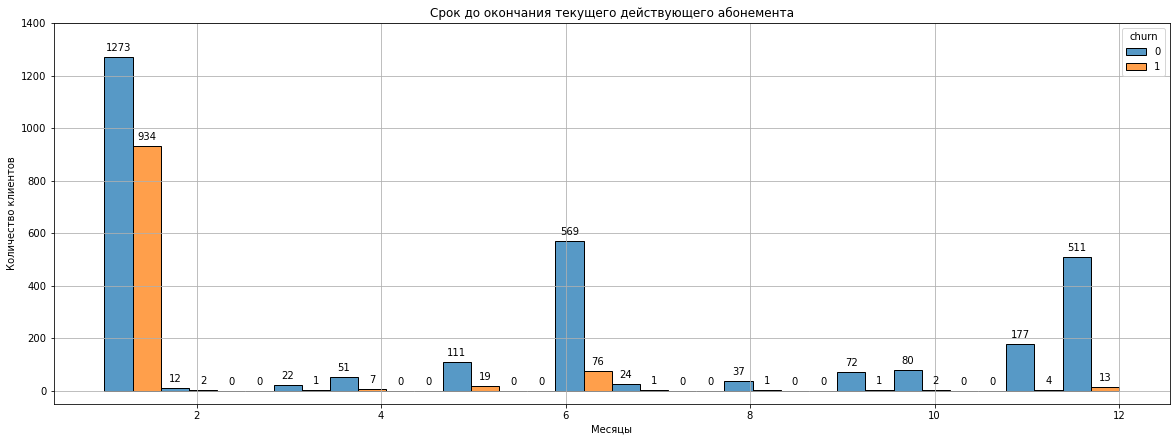

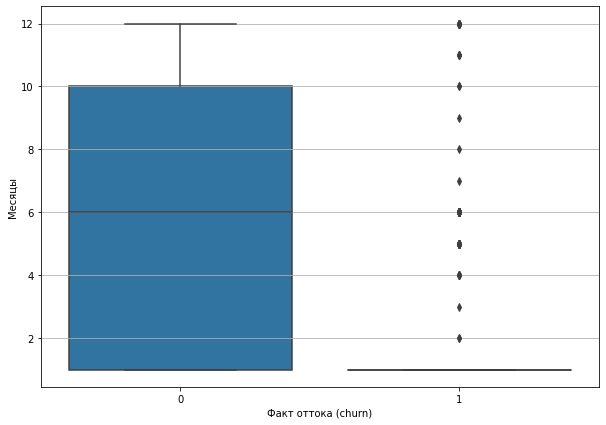

In [25]:
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.title('Cрок до окончания текущего действующего абонемента')
plot = sns.histplot(data = gym_churn, x = 'month_to_end_contract', hue = 'churn', multiple="dodge")
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plot.set_ylim(-50, 1400)    
plt.ylabel('Количество клиентов')
plt.xlabel('Месяцы')
plt.show()


plt.figure(figsize=(10, 7))
plt.grid(True)
sns.boxplot(data = gym_churn, y = 'month_to_end_contract', x = 'churn')
plt.ylabel('Месяцы')
plt.xlabel('Факт оттока (churn)')
plt.show()
#display(gym_churn.groupby('churn')['month_to_end_contract'].describe().astype('int').T)
#display(gym_churn.groupby(['churn', 'month_to_end_contract']).count()\
#                                                        .astype('int').reset_index())

У многих постоянных клиентов абонемент заканчивается через 12, 6 и 1 месяцев. У непостоянных, в основном, через 1 месяц. 

<a id = "step_2_3_2_4"></a>
2.3.2.4. Признак `lifetime` — время с момента первого обращения в фитнес-центр (в месяцах):</p>
[К содержанию](#table_of_contents)

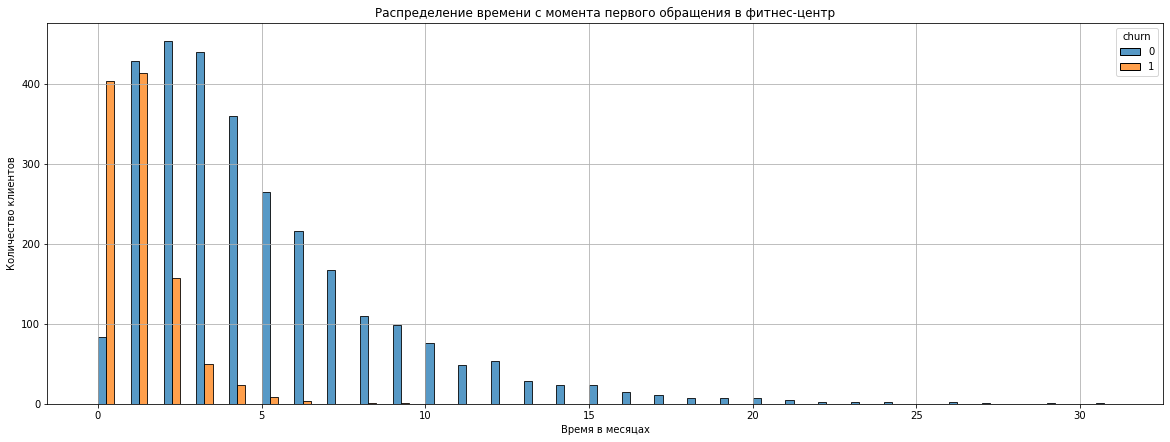

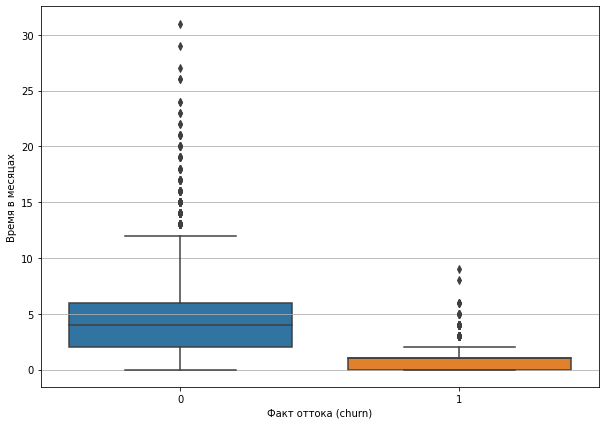

churn,0,1
count,2939,1061
mean,4,0
std,3,1
min,0,0
25%,2,0
50%,4,1
75%,6,1
max,31,9


In [26]:
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.title('Распределение времени с момента первого обращения в фитнес-центр')
sns.histplot(data = gym_churn, x = 'lifetime', hue = 'churn', multiple="dodge")
#sns.countplot(data = gym_churn, x = 'lifetime', hue = 'churn')
plt.ylabel('Количество клиентов')
plt.xlabel('Время в месяцах')
plt.show()


plt.figure(figsize=(10, 7))
plt.grid(True)
sns.boxplot(data = gym_churn, y = 'lifetime', x = 'churn')
plt.ylabel('Время в месяцах')
plt.xlabel('Факт оттока (churn)')
plt.show()
display(gym_churn.groupby('churn')['lifetime'].describe().astype('int').T)

Из графика видно, что чем меньше клиент посещает фитнес - центр, тем больше оттока.

<a id = "step_2_3_2_5"></a>
2.3.2.5. Признак `Avg_class_frequency_total` - средняя частота посещений в неделю за все время с начала действия абонемента:</p>
[К содержанию](#table_of_contents)

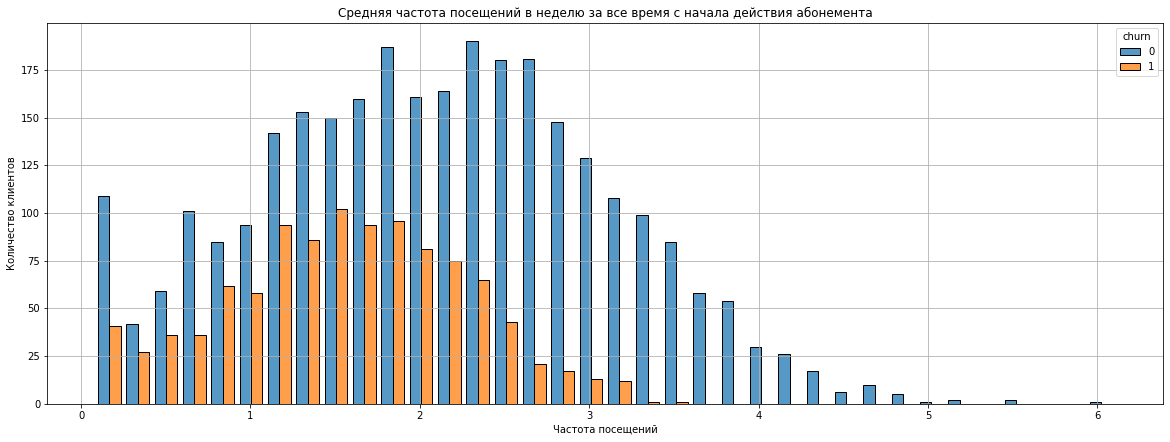

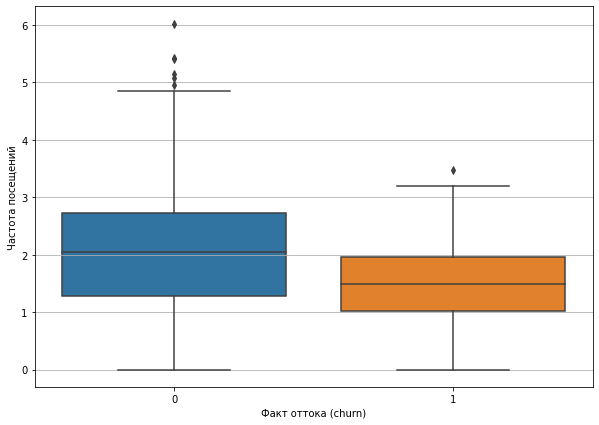

churn,0,1
count,2939,1061
mean,2,1
std,1,0
min,0,0
25%,1,1
50%,2,1
75%,2,1
max,6,3


In [27]:
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.title('Средняя частота посещений в неделю за все время с начала действия абонемента')
sns.histplot(data = gym_churn, x = 'avg_class_frequency_total', hue = 'churn', multiple="dodge", shrink=.8)
plt.ylabel('Количество клиентов')
plt.xlabel('Частота посещений')
plt.show()


plt.figure(figsize=(10, 7))
plt.grid(True)
sns.boxplot(data = gym_churn, y = 'avg_class_frequency_total', x = 'churn')
plt.ylabel('Частота посещений')
plt.xlabel('Факт оттока (churn)')
plt.show()
display(gym_churn.groupby('churn')['avg_class_frequency_total'].describe().astype('int').T)

Постоянные клиенты ходят в фитнес-центр в 2 раза чаще непостоянных.

<a id = "step_2_3_2_6"></a>
2.3.2.6. Признак `avg_class_frequency_current_month` - средняя частота посещений в неделю за предыдущий месяц:</p>
[К содержанию](#table_of_contents)

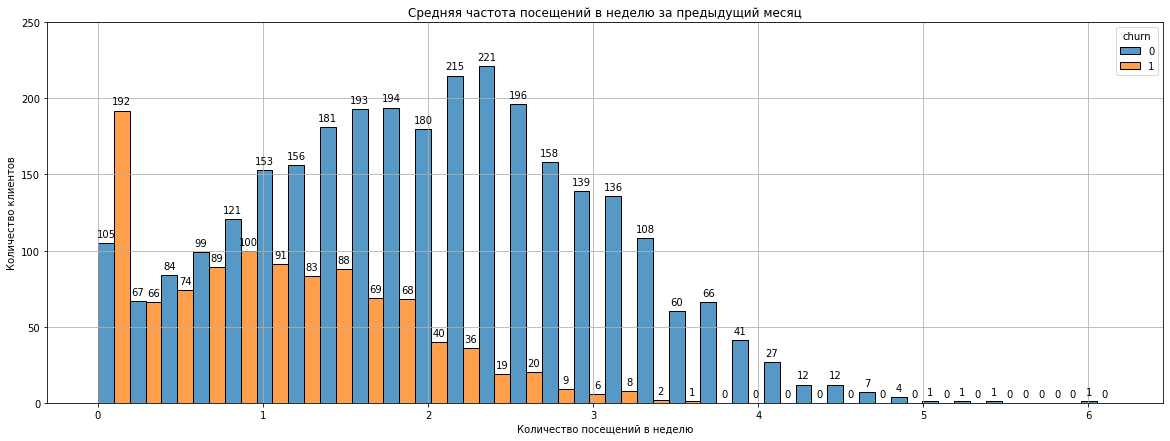

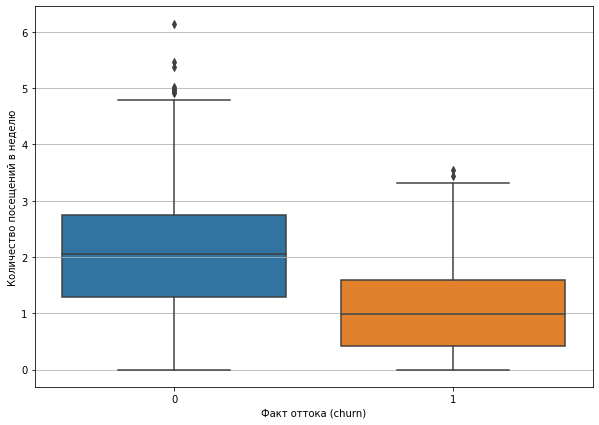

churn,0,1
count,2939,1061
mean,2,1
std,1,0
min,0,0
25%,1,0
50%,2,0
75%,2,1
max,6,3


In [28]:
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.title('Средняя частота посещений в неделю за предыдущий месяц')
plot = sns.histplot(data = gym_churn, x = 'avg_class_frequency_current_month', hue = 'churn', multiple="dodge")
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plot.set_ylim(0, 250)    
plt.ylabel('Количество клиентов')
plt.xlabel('Количество посещений в неделю')
plt.show()


plt.figure(figsize=(10, 7))
plt.grid(True)
sns.boxplot(data = gym_churn, y = 'avg_class_frequency_current_month', x = 'churn')
plt.ylabel('Количество посещений в неделю')
plt.xlabel('Факт оттока (churn)')
plt.show()

display(gym_churn.groupby('churn')['avg_class_frequency_current_month'].describe().astype('int').T)

В прошлом месяце, постоянные клиенты ходили в фитнес - центр в 2 раза чаще непостоянных.

<a id = "step_2_4"></a>
##### 2.4. Матрица корреляций.
[К содержанию](#table_of_contents)

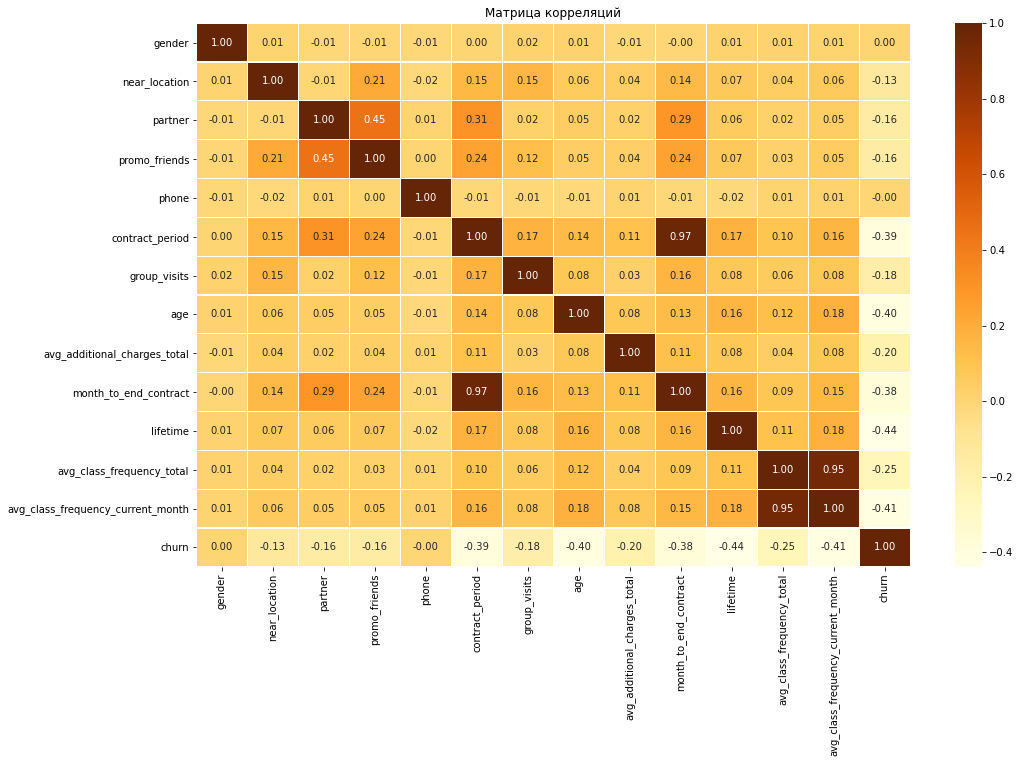

In [29]:
cm = gym_churn.corr()
plt.figure(figsize=(16, 10))
plt.title('Матрица корреляций')
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.1, cmap = 'YlOrBr')
plt.show()

Сильная корреляция у признаков:
- `month_to_end_contract` и `contract_period`, коэффициент корреляции: 0,97. 
- `avg_class_frequency_current_month` и `avg_class_frequency_total`, коэффициент корреляции: 0,95.


Отсутствует влияние признаков `gender` и `phone` на целевую переменную `churn`

<a id="step_2_total"></a>
### Шаг 2. Вывод.
[К содержанию](#table_of_contents)

Фитнес - центр посещают в среднем 2 раза в неделю, примерно в равном количестве как мужчины, так и женщины, проживающие или работающие в том же районе, возраст 29 лет, на доп. услуги тратят 158р. 

Факт оттока больше, если:
- клиент купил абонемент на 1 месяц;
- клиент более молодой;
- срок до окончания текущего действующего абонемента - месяц;

Факт оттока меньше, если:
- книент проживает / работает в том же районе;
- клиент является клиентом - партнером;
- клиент пришел по акции "приведи друга";
- клиент купил абонемент на 12 месяцев;
- клиент посещает групповые занятия;
- клиент более возрастной;
- срок до окончания текущего действующего абонемента -  больше месяца;
- клиент давно ходит в фитнес - центр;
- клиент более 2х раз в неделю посещает фитнес - центр;

<a id="step_3"></a>
### Шаг 3. Построение модели прогнозирования оттока пользователей.
[К содержанию](#table_of_contents)

<a id = "step_3_1"></a>
##### 3.1. Разбиение данных на обучающую и валидационную выборку.
[К содержанию](#table_of_contents)

In [30]:
X = gym_churn.drop('churn', axis = 1)
y = gym_churn['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify = y)

scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) 
X_test_st = scaler.transform(X_test) 

<a id = "step_3_2"></a>
##### 3.2. Обучение модели на train-выборке.

<a id = "step_3_2_1"></a>
##### 3.2.1. Логистическая регрессия.
[К содержанию](#table_of_contents)

In [31]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

In [32]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predictions)))

Accuracy: 0.92
Precision: 0.88
Recall: 0.81
F1: 0.84


<a id = "step_3_2_2"></a>
##### 3.2.2. Cлучайный лес.
[К содержанию](#table_of_contents)

In [33]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)

rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [34]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.88
Recall: 0.83
F1: 0.85


<a id = "step_3_3"></a>
##### 3.3. Оценка метрик accuracy, precision и recall для обеих моделей на валидационной выборке. Сравние по ним моделей. Какая модель показала себя лучше на основании метрик?

Доля правильных ответов (Accuracy):
- Логистическая регрессия - 0,92
- Cлучайный лес - 0,92

Точность (Precision):
- Логистическая регрессия - 0,88
- Cлучайный лес - 0,88 

Полнота (Recall):
- Логистическая регрессия - 0,81
- Cлучайный лес - 0,83

F1-мера (F1):
- Логистическая регрессия - 0,84
- Cлучайный лес - 0,85

<a id="step_3_total"></a>
### Шаг 3. Вывод.
[К содержанию](#table_of_contents)

В соответсвии с метриками, модели не сильно отличаются, хотя случайный лес показала себя немного лучше логистической регрессии.

<a id="step_4"></a>
### Шаг 4. Кластеризация пользователей.

<a id = "step_4_1"></a>
##### 4.1. Стандартизация данных.
[К содержанию](#table_of_contents)

In [35]:
x_sc = scaler.fit_transform(X)

<a id = "step_4_2"></a>
##### 4.2. Посторение матрицы расстояний на стандартизованной матрице признаков + дендрограмма.
[К содержанию](#table_of_contents)

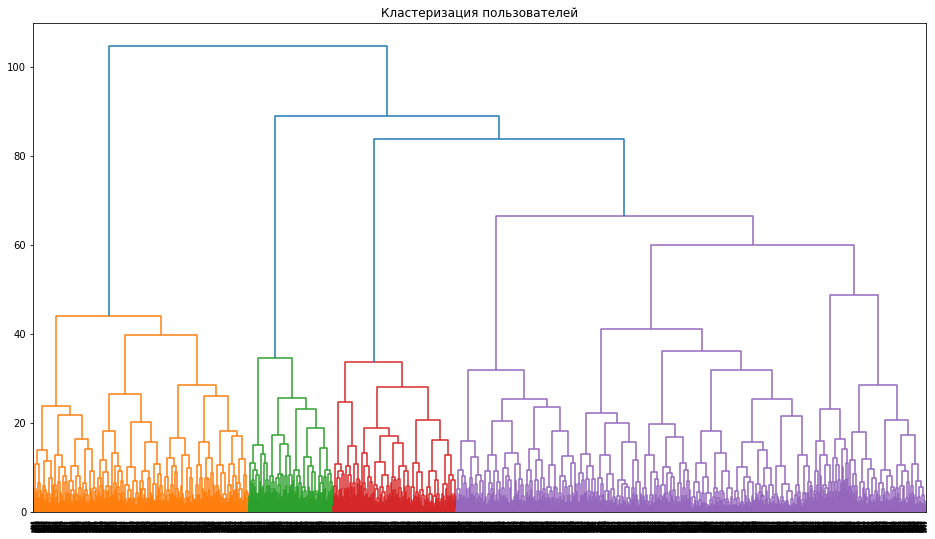

In [36]:
linked = linkage(x_sc, method = 'ward')


plt.figure(figsize=(16, 9))  
plt.title('Кластеризация пользователей')
dendrogram(linked, orientation = 'top')
plt.show()

<a id = "step_4_3"></a>
##### 4.3. Обучение модели кластеризации на основании алгоритма K-Means и прогноз кластеров клиентов. Число кластеров принимаем за 5.
[К содержанию](#table_of_contents)

In [37]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(x_sc)

<a id = "step_4_4"></a>
##### 4.4. Средние значения признаков для кластеров.
[К содержанию](#table_of_contents)

In [38]:
gym_churn['cluster'] = labels
gym_churn.groupby(['cluster']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,0.480787,0.812559,0.000000,0.086223,1.000000,1.866917,0.325211,28.145267,131.369042,1.791003,2.345829,1.325865,1.086883,0.550141
2,0.559567,0.858002,0.338147,0.197353,0.998797,2.730445,0.448857,30.196149,164.579011,2.519856,5.010830,2.928140,2.934140,0.048135
3,0.509603,0.750320,1.000000,0.451985,1.000000,2.554417,0.303457,28.499360,129.812508,2.370038,2.832266,1.355379,1.176172,0.395647
4,0.495726,0.943376,0.752137,0.541667,1.000000,11.352564,0.564103,29.993590,164.563799,10.376068,4.817308,2.028169,2.020129,0.023504


<a id = "step_4_5"></a>
##### 4.5. Распределения признаков в кластерах. 
[К содержанию](#table_of_contents)

Признак `gender`:

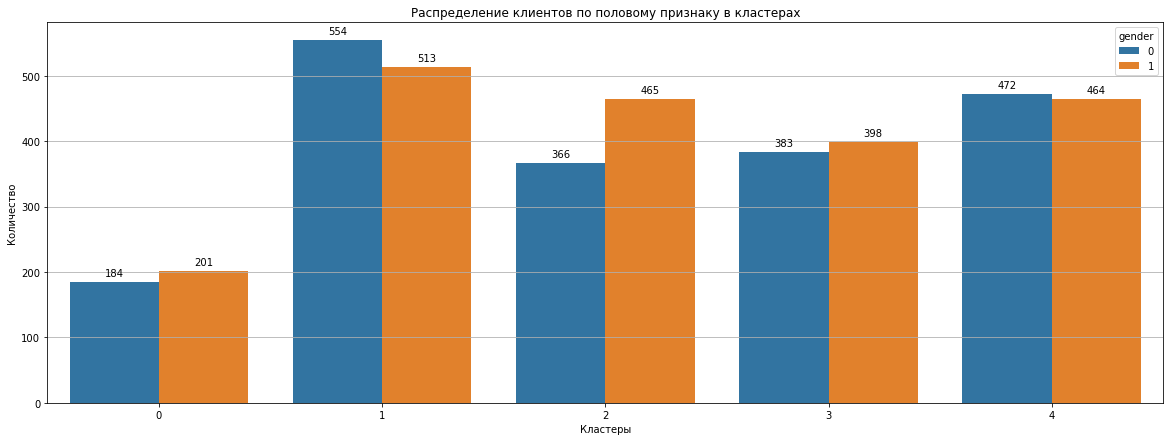

cluster  gender
0        1         201
         0         184
1        0         554
         1         513
2        1         465
         0         366
3        1         398
         0         383
4        0         472
         1         464
Name: gender, dtype: int64

In [39]:
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.title('Распределение клиентов по половому признаку в кластерах')
plot = sns.countplot(data = gym_churn, x = 'cluster', hue = 'gender')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Кластеры")
plt.ylabel("Количество")
plt.show()

display(gym_churn.groupby('cluster')['gender'].value_counts())

Во всех кластерах мужчины и женщины распределены практически одинаково, за исключением кластера 2.

Признак `near_location`:

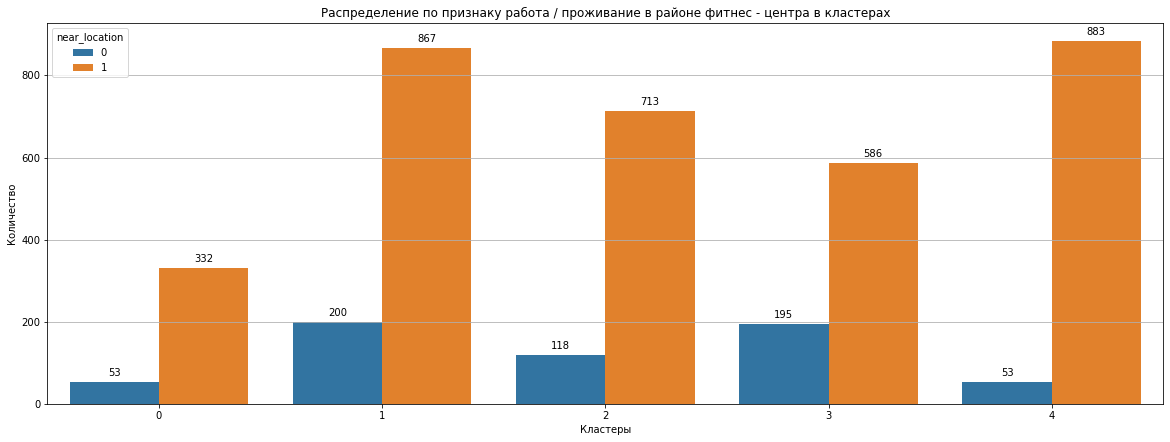

cluster  near_location
0        1                332
         0                 53
1        1                867
         0                200
2        1                713
         0                118
3        1                586
         0                195
4        1                883
         0                 53
Name: near_location, dtype: int64

In [40]:
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.title('Распределение по признаку работа / проживание в районе фитнес - центра в кластерах')
plot = sns.countplot(data = gym_churn, x = 'cluster', hue = 'near_location')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Кластеры")
plt.ylabel("Количество")
plt.show()

display(gym_churn.groupby('cluster')['near_location'].value_counts())

В кластер 4 попали клиенты, проживающие / работающие в том же районе, что и фитнес центр, в кластере 3 много клиентов из других районов.

Признак `partner`:

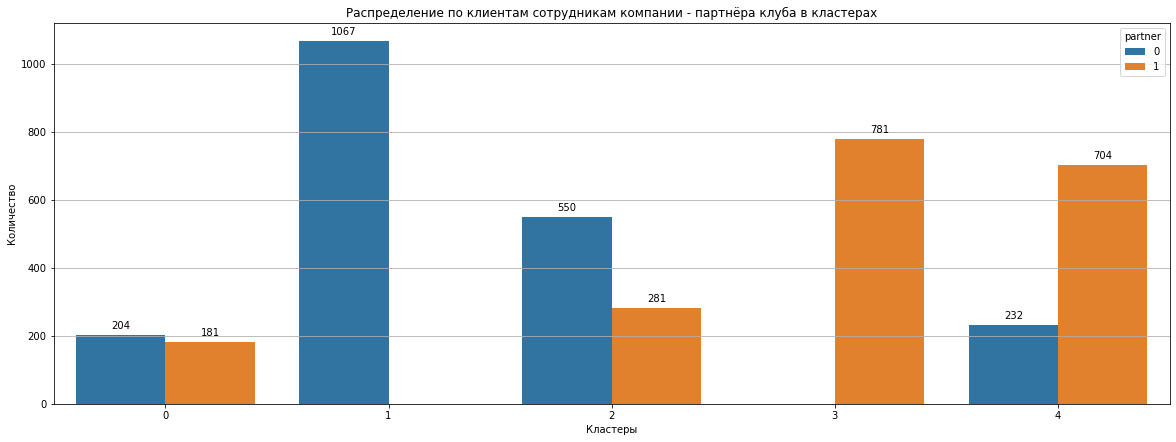

cluster  partner
0        0           204
         1           181
1        0          1067
2        0           550
         1           281
3        1           781
4        1           704
         0           232
Name: partner, dtype: int64

In [41]:
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.title('Распределение по клиентам сотрудникам компании - партнёра клуба в кластерах')
plot = sns.countplot(data = gym_churn, x = 'cluster', hue = 'partner')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Кластеры")
plt.ylabel("Количество")
plt.show()

display(gym_churn.groupby('cluster')['partner'].value_counts())

В кластер 3 и 4 попали клиенты сотрудники - партнеров. В 1 и 2 - независимые клиенты.

Признак `promo_friends`:

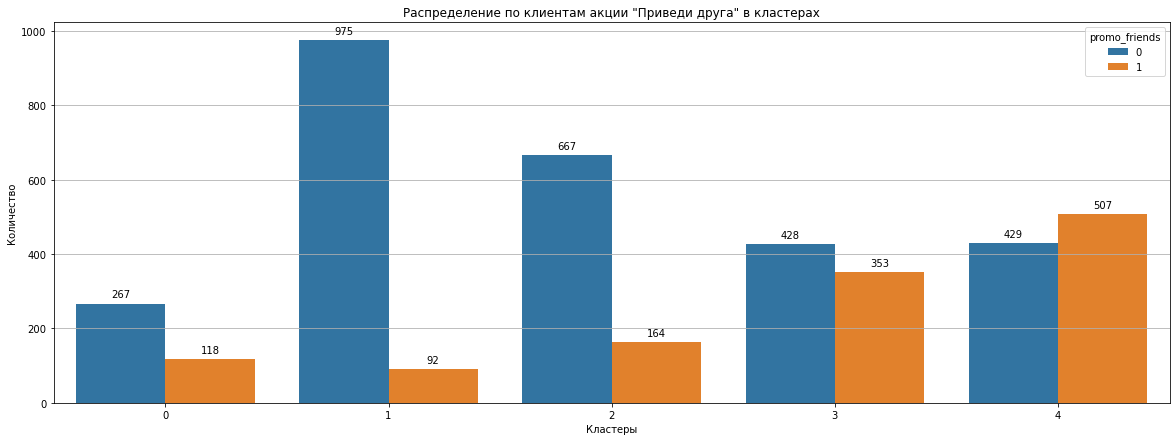

cluster  promo_friends
0        0                267
         1                118
1        0                975
         1                 92
2        0                667
         1                164
3        0                428
         1                353
4        1                507
         0                429
Name: promo_friends, dtype: int64

In [42]:
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.title('Распределение по клиентам акции "Приведи друга" в кластерах')
plot = sns.countplot(data = gym_churn, x = 'cluster', hue = 'promo_friends')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Кластеры")
plt.ylabel("Количество")
plt.show()

display(gym_churn.groupby('cluster')['promo_friends'].value_counts())

В кластеры 1 и 2 в основном попали независимые клиенты, в то время, как в кластер 4 - клиенты по акции.

Признак `phone`:

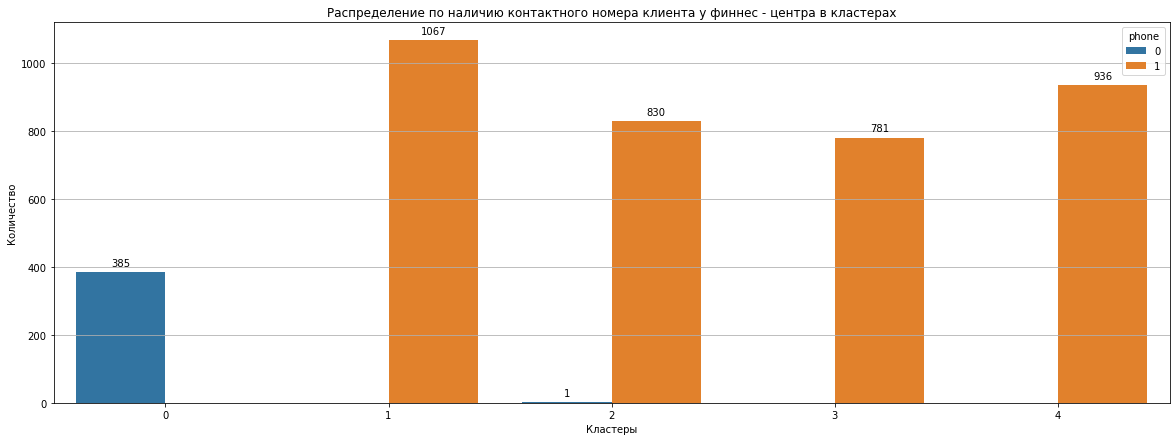

cluster  phone
0        0         385
1        1        1067
2        1         830
         0           1
3        1         781
4        1         936
Name: phone, dtype: int64

In [43]:
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.title('Распределение по наличию контактного номера клиента у финнес - центра в кластерах')
plot = sns.countplot(data = gym_churn, x = 'cluster', hue = 'phone')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Кластеры")
plt.ylabel("Количество")
plt.show()

display(gym_churn.groupby('cluster')['phone'].value_counts())

Контакты клиентов кластера 0 у фитнес - центра отсутствуют.

Признак `contract_period`:

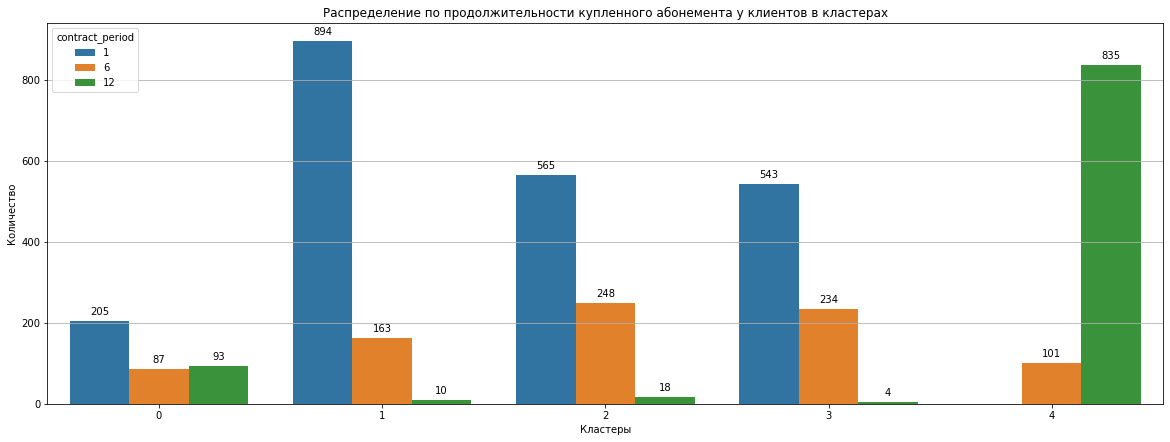

cluster  contract_period
0        1                  205
         12                  93
         6                   87
1        1                  894
         6                  163
         12                  10
2        1                  565
         6                  248
         12                  18
3        1                  543
         6                  234
         12                   4
4        12                 835
         6                  101
Name: contract_period, dtype: int64

In [44]:
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.title('Распределение по продолжительности купленного абонемента у клиентов в кластерах')
plot = sns.countplot(data = gym_churn, x = 'cluster', hue = 'contract_period')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Кластеры")
plt.ylabel("Количество")
plt.show()

display(gym_churn.groupby('cluster')['contract_period'].value_counts())

В кластере 4 в основном те, кто купил абонемент на 12 месяцев, в кластере 1 - на 1 меяц.

Признак `group_visits`:

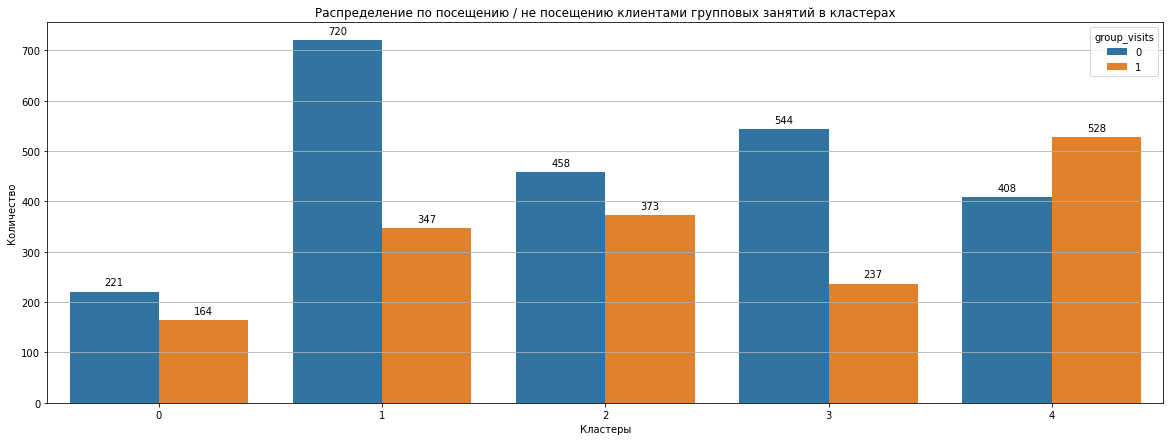

cluster  group_visits
0        0               221
         1               164
1        0               720
         1               347
2        0               458
         1               373
3        0               544
         1               237
4        1               528
         0               408
Name: group_visits, dtype: int64

In [45]:
plt.figure(figsize = (20, 7))
plt.grid(True)
plt.title('Распределение по посещению / не посещению клиентами групповых занятий в кластерах')
plot = sns.countplot(data = gym_churn, x = 'cluster', hue = 'group_visits')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Кластеры")
plt.ylabel("Количество")
plt.show()

display(gym_churn.groupby('cluster')['group_visits'].value_counts())

В кластере 1 и 3, те, кто в основном не посещяют групповые занятия. В кластере 4 - посещяют.

Признак `age`:

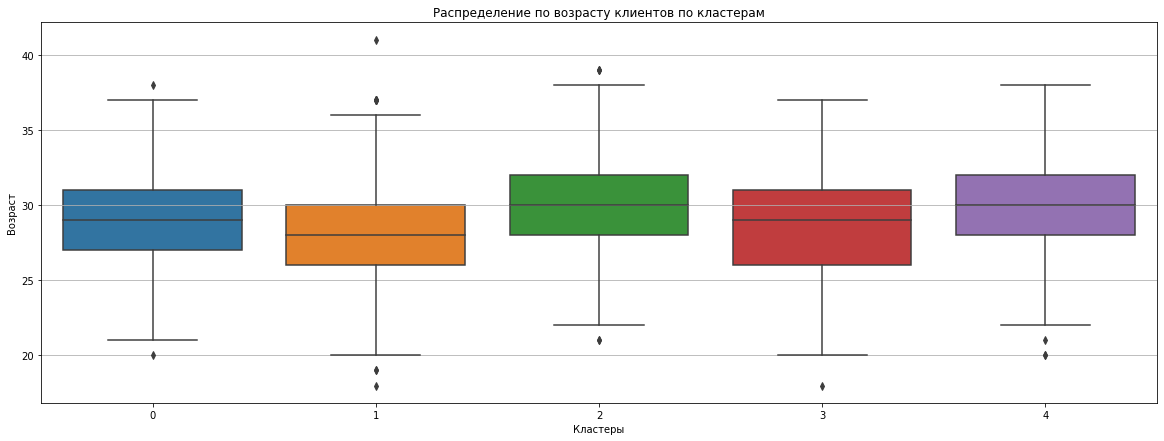

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,385.0,29.301299,3.164356,20.0,27.0,29.0,31.0,38.0
1,1067.0,28.145267,3.256756,18.0,26.0,28.0,30.0,41.0
2,831.0,30.196149,3.024205,21.0,28.0,30.0,32.0,39.0
3,781.0,28.499360,3.156850,18.0,26.0,29.0,31.0,37.0
4,936.0,29.993590,3.094581,20.0,28.0,30.0,32.0,38.0


In [46]:
plt.figure(figsize = (20, 7))
plt.grid(True)
plt.title('Распределение по возрасту клиентов по кластерам')
sns.boxplot(data = gym_churn, x = 'cluster', y = 'age')
plt.xlabel("Кластеры")
plt.ylabel('Возраст')
plt.show()
    
display(gym_churn.groupby('cluster')['age'].describe())

"Возрастные" кластеры: 2 и 4, "молодые" кластеры - 1 и 3.

Признак `avg_additional_charges_total`:

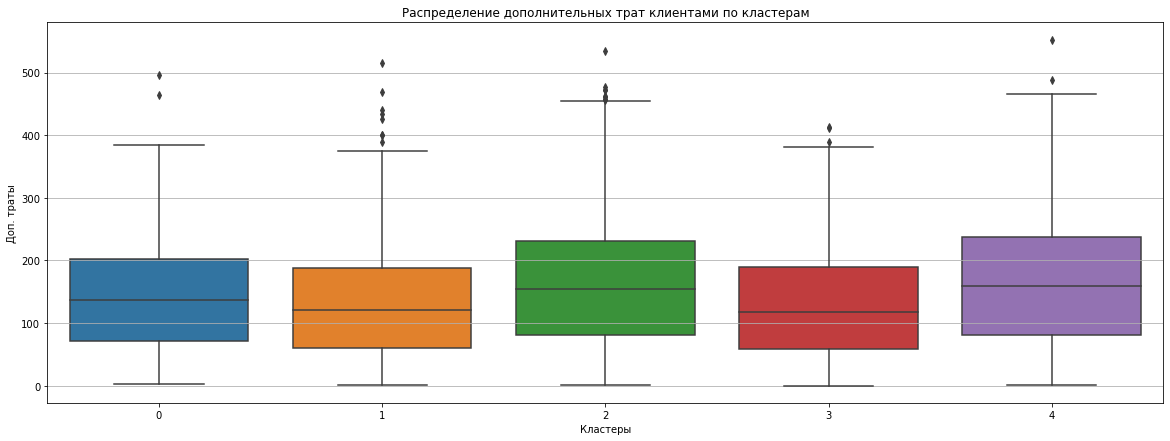

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,385.0,143.957664,94.118283,1.767654,70.984926,136.917294,201.942959,496.172222
1,1067.0,131.369042,87.578456,0.171862,60.063679,120.503951,188.363101,515.392606
2,831.0,164.579011,104.162472,0.362153,80.774852,153.967808,230.556242,534.256182
3,781.0,129.812508,87.680552,0.148205,57.843943,117.492052,189.476216,412.608848
4,936.0,164.563799,100.842177,0.251606,80.942137,159.530587,237.623051,552.590740


In [47]:
plt.figure(figsize = (20, 7))
plt.grid(True)
plt.title('Распределение дополнительных трат клиентами по кластерам')
sns.boxplot(data = gym_churn, x = 'cluster', y = 'avg_additional_charges_total')
plt.xlabel("Кластеры")
plt.ylabel('Доп. траты')
plt.show()
    
display(gym_churn.groupby('cluster')['avg_additional_charges_total'].describe())

Больше дополнительные траты у клиентов в кластерах 2 и 4, самые экономные - в 3.

Признак `month_to_end_contract`:

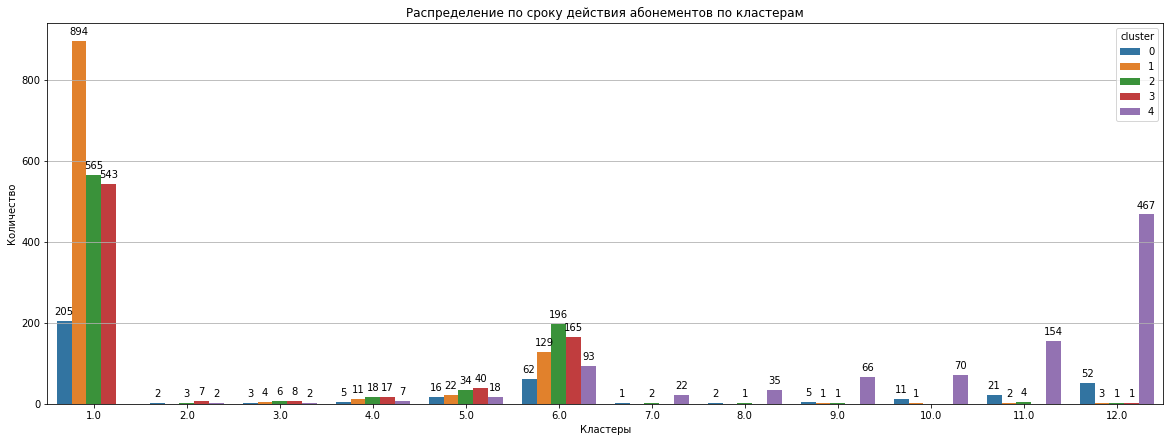

In [48]:
plt.figure(figsize = (20, 7))
plt.grid(True)
plt.title('Распределение по сроку действия абонементов по кластерам')
plot = sns.countplot(data = gym_churn, x = 'month_to_end_contract', hue = 'cluster')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Кластеры")
plt.ylabel("Количество")
plt.show()
    
#display(gym_churn.groupby('cluster')['month_to_end_contract'].value_counts())

В кастеры 1, 2, 3 попали те клиенты, у которых до конца срока действия абонемента остался месяц. В кластере 4 те, у которых абонемент еще на год.

Признак `lifetime`:

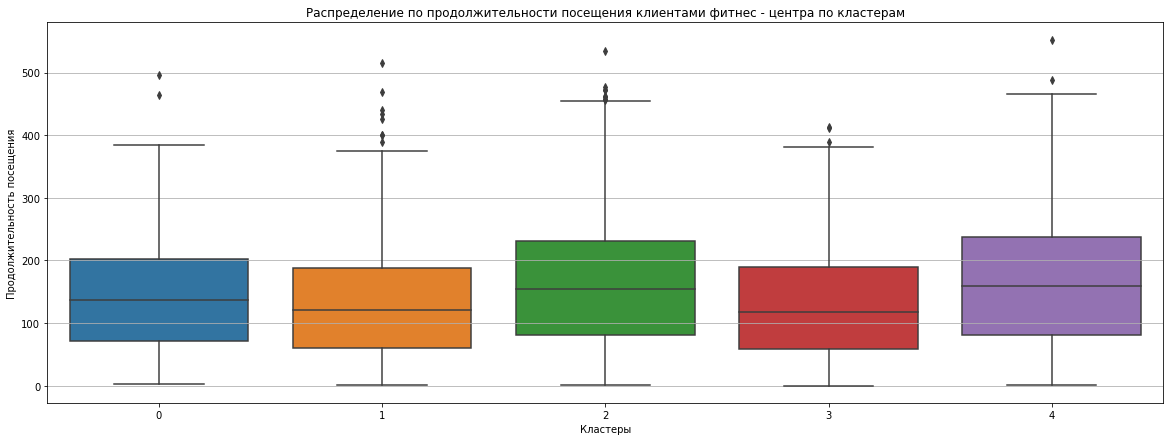

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,385.0,143.957664,94.118283,1.767654,70.984926,136.917294,201.942959,496.172222
1,1067.0,131.369042,87.578456,0.171862,60.063679,120.503951,188.363101,515.392606
2,831.0,164.579011,104.162472,0.362153,80.774852,153.967808,230.556242,534.256182
3,781.0,129.812508,87.680552,0.148205,57.843943,117.492052,189.476216,412.608848
4,936.0,164.563799,100.842177,0.251606,80.942137,159.530587,237.623051,552.590740


In [49]:
plt.figure(figsize = (20, 7))
plt.grid(True)
plt.title('Распределение по продолжительности посещения клиентами фитнес - центра по кластерам')
sns.boxplot(data = gym_churn, x = 'cluster', y = 'avg_additional_charges_total')
plt.xlabel("Кластеры")
plt.ylabel('Продолжительность посещения')
plt.show()
    
display(gym_churn.groupby('cluster')['avg_additional_charges_total'].describe())

В 2 и 4 кластерах самые старые клиенты, в кластерах 1 и 3 самые молодые.

Признак `avg_class_frequency_total`:

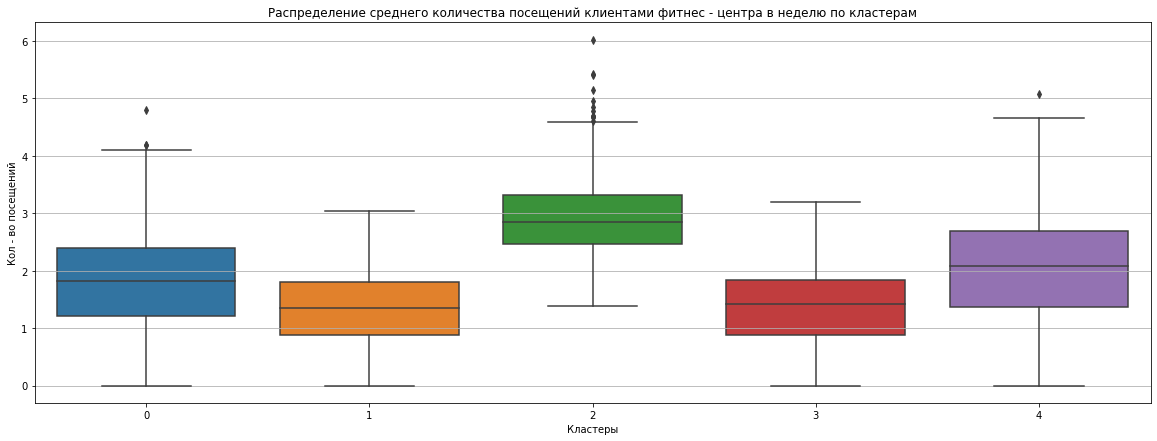

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,385.0,1.847220,0.927682,0.000000,1.209434,1.823102,2.391508,4.793780
1,1067.0,1.325865,0.636852,0.000000,0.882220,1.346593,1.808549,3.030928
2,831.0,2.928140,0.654646,1.388771,2.467464,2.848327,3.318636,6.023668
3,781.0,1.355379,0.677022,0.000000,0.887009,1.420713,1.837830,3.188502
4,936.0,2.028169,0.940796,0.000000,1.372061,2.078256,2.691223,5.079242


In [50]:
plt.figure(figsize = (20, 7))
plt.grid(True)
plt.title('Распределение среднего количества посещений клиентами фитнес - центра в неделю по кластерам')
sns.boxplot(data = gym_churn, x = 'cluster', y = 'avg_class_frequency_total')
plt.xlabel("Кластеры")
plt.ylabel('Кол - во посещений')
plt.show()
    
display(gym_churn.groupby('cluster')['avg_class_frequency_total'].describe())

В кластер 2 попали самые сильные любители фитнеса. В кластерах 1 и 3 - нелюбители.

Признак `avg_class_frequency_current_month`:

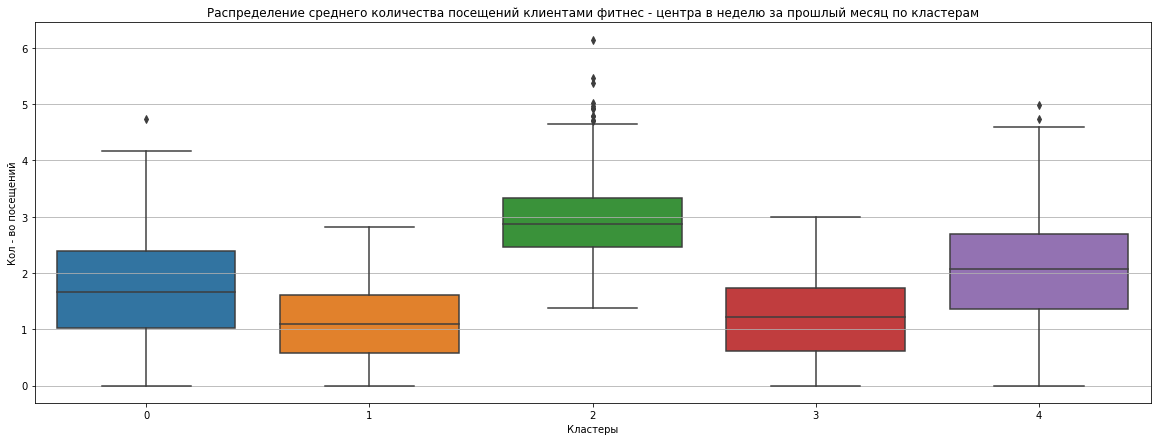

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,385.0,1.716369,1.013286,0.000000,1.022833,1.653470,2.383973,4.729706
1,1067.0,1.086883,0.671875,0.000000,0.578101,1.101623,1.603395,2.812503
2,831.0,2.934140,0.661064,1.380459,2.453350,2.868585,3.334571,6.146783
3,781.0,1.176172,0.715365,0.000000,0.605374,1.215461,1.728905,2.992209
4,936.0,2.020129,0.946047,0.000000,1.365066,2.075600,2.685188,4.976680


In [51]:
plt.figure(figsize = (20, 7))
plt.grid(True)
plt.title('Распределение среднего количества посещений клиентами фитнес - центра в неделю за прошлый месяц по кластерам')
sns.boxplot(data = gym_churn, x = 'cluster', y = 'avg_class_frequency_current_month')
plt.xlabel("Кластеры")
plt.ylabel('Кол - во посещений')
plt.show()
    
display(gym_churn.groupby('cluster')['avg_class_frequency_current_month'].describe())

В кластере 2 - те клиенты, которые в прошлом месяце больше всего дней в неделю посещали финтнес - центр. В 1 и 3 - те, кто наименее всего посещали в прошлом месяце. 

Признак `churn`:

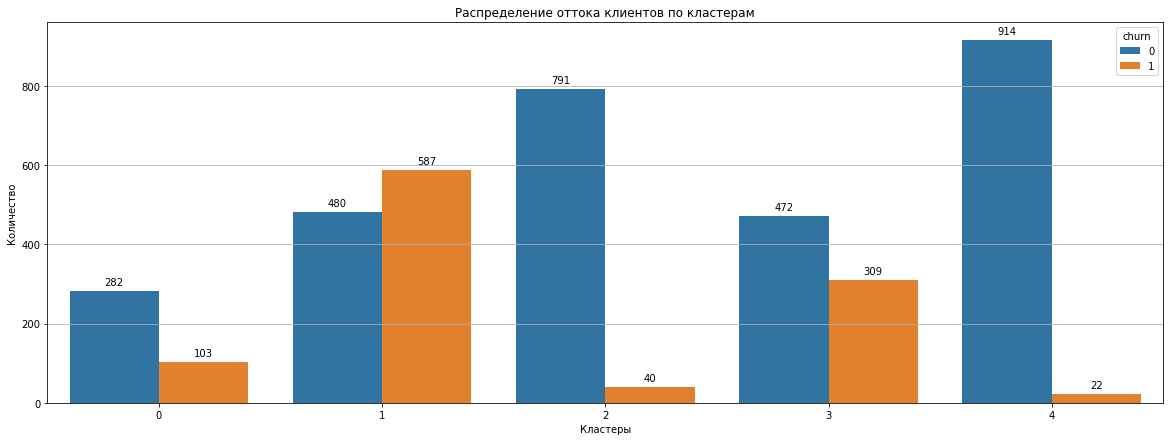

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,385.0,0.267532,0.443248,0.0,0.0,0.0,1.0,1.0
1,1067.0,0.550141,0.497713,0.0,0.0,1.0,1.0,1.0
2,831.0,0.048135,0.214180,0.0,0.0,0.0,0.0,1.0
3,781.0,0.395647,0.489302,0.0,0.0,0.0,1.0,1.0
4,936.0,0.023504,0.151580,0.0,0.0,0.0,0.0,1.0


In [52]:
plt.figure(figsize = (20, 7))
plt.grid(True)
plt.title('Распределение оттока клиентов по кластерам')
plot = sns.countplot(data = gym_churn, x = 'cluster', hue = 'churn')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Кластеры")
plt.ylabel("Количество")
plt.show()
    
display(gym_churn.groupby('cluster')['churn'].describe())

В кластерах 2 и 4 самый минимальный отток. Наибольший отток в кластерах 1 и 3.

<a id="step_4_total"></a>
### Шаг 4. Вывод.
[К содержанию](#table_of_contents)

В соответствии с проведенным анализом, можно сделать вывод, что кластер 4 самый надежный. В него попали клиенты, которые: 
- проживают / работают в том же районе, что и фитнес центр;
- являются клинтам от партнеров (большинство);
- большинство пришло по акции "приведи друга";
- купили абонемент на год;
- посещают групповые занятия;
- в основном клиенты страршей возрастной группы;
- больше трятят на доп. услуги;
- больший срок действия у абонемента;
- дольше всех являются клиентами финнес - центра;
- в среднем, много посещают занятий в неделю, как за текущий период, так и за прошлый месяц;
- самый минимальный отток клиентов.

Немного менее недежным, чем кластер 4, является кластер 2, он немогим уступает кластеру 4 всего по нескольким пунктам. Клиенты этого кластера пришли в фитнес - центр независимо, не по акции, купили абонемент на 1 месяц. Однако, клиенты этого кластера больше всех посещают занятий в неделю и за прошлый месяц включительно, что являеся позитивнам признаком.

Самым ненадежным кластером практически по всем признакам являются кластеры 1 и 3. Так же, в этих кластерах максимальный отток.

<a id="step_total"></a>
### Итог.
[К содержанию](#table_of_contents)

Самым надежным является возрастной клиент, который долгое время посещает фитнес - центр, проживает / работает в том же районе, является сотрудником компании - партнёра клуба или пришел по акции "приведи друга", купил абонемент на 12 месяцев, посещает групповые занятия, много тратит на доп. услуги, много раз в неделю ходит на занятия.

Так же, можно судить и ненадежном клиенте, склонным к оттоку. Такие признаки как: покупка месячного абонемента, проживание / работа в другом районе, молодой возраст, малое количество посещений занятий в неделю.

Рекомендации:

Проработать вопросы мотивации тех клиентов, которые подвержаны признакам оттока (скидки, акции, бонусы). Также, необходимо поощрять надежных клиентов. Стоит сделать упор на увеличение числа компаний - партнеров клуба, скидки на длительные абонементы, периодические акции на бесплатные посещения групповых занятий. Возможно, проработать специальную программу для привлечения и поддержки более молодых клиентов.